In [240]:
#downloading dataset, importing libraries

import pandas as pd

import numpy as np

import os

import matplotlib.pyplot as plt

import seaborn as sns

import sys

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import RandomForestClassifier

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [241]:
# reading the file...

df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

df.head()

df.dropna()



,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0
...,...,...,...,...,...,...,...,...
9995,3972488,0,3033.647103,2553.733144,42691.62787,5,697,0
9996,6184073,1,4146.239304,5458.163525,79969.50521,8,615,0
9997,6694516,2,3088.223727,4813.090925,38192.67591,5,596,0
9998,3942961,0,3288.901666,1043.099660,50929.37206,2,647,0


In [242]:
#dropping unwanted columns
del df['customer_id']

In [243]:
# encoding X_train and X_test
enc = OrdinalEncoder()


df[['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score']] = enc.fit_transform(df[['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'fico_score' ]]
)

selected_features = df[['loan_amt_outstanding', 'total_debt_outstanding', 'income', 'years_employed', 'fico_score']]
display(selected_features)

,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score
0,7816.0,2229.0,6558.0,5,158.0
1,445.0,6097.0,163.0,2,125.0
2,3041.0,852.0,4163.0,4,155.0
3,6876.0,1120.0,5795.0,5,165.0
4,129.0,721.0,107.0,6,184.0
...,...,...,...,...,...
9995,2167.0,1152.0,838.0,5,250.0
9996,5259.0,3767.0,6879.0,8,168.0
9997,2321.0,3084.0,554.0,5,149.0
9998,2837.0,414.0,1687.0,2,200.0


In [244]:
print("Classification models to be trained as it will help predict which category a loan belongs to i.e. default or not")


Classification models to be trained as it will help predict which category a loan belongs to i.e. default or not


<Axes: >

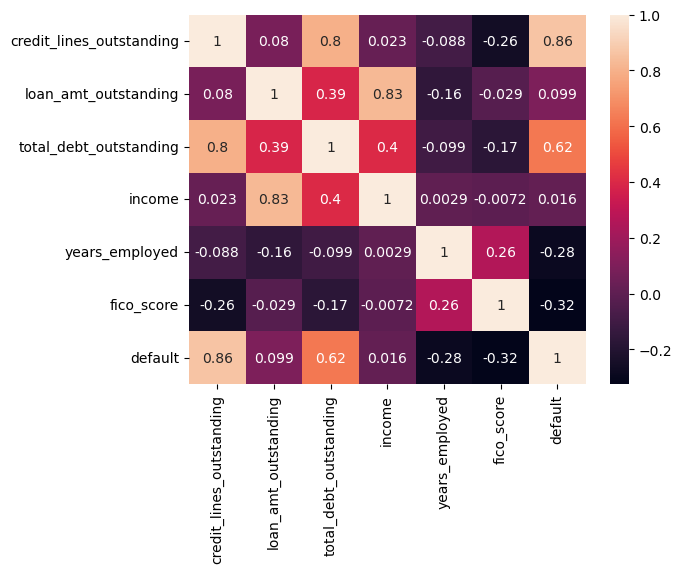

In [245]:
sns.heatmap(df.corr(), annot = True)

In [246]:
#selecting and scaling X variable (selected features)
scaler = StandardScaler()

X = scaler.fit_transform(selected_features)

In [247]:
# defining y variable

y = df['default'].values

In [248]:
#creating a split (train/test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)


In [249]:
# training the KNN model and predicting (test)
from sklearn.neighbors import KNeighborsClassifier 

model = KNeighborsClassifier(n_neighbors=K)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

score= model.score(X_test, y_test)


print(str(score))
print ((y_pred))



0.9585
[0 1 1 ... 0 0 0]


In [250]:
# training the Decision Tree model
from sklearn.tree import DecisionTreeClassifier

model_tree = DecisionTreeClassifier(criterion = "entropy", max_leaf_nodes = 1000)

model_tree.fit(X_train, y_train)

y_pred_tree = model_tree.predict(X_test)

score_tree = model_tree.score(X_test, y_test)

print(str(score_tree))
print((y_pred_tree))

0.976
[0 1 1 ... 0 0 0]


In [251]:
#Training the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model_RF = RandomForestClassifier(n_estimators = 10, bootstrap = True)

model_RF.fit(X_train, y_train)

model_RFscore = model_RF.score(X_test, y_test)

y_pred_RF = model_RF.predict(X_test)

print(str(model_RFscore))
print((y_pred_RF))
      

0.98
[0 0 1 ... 0 0 0]


<function matplotlib.pyplot.show(close=None, block=None)>

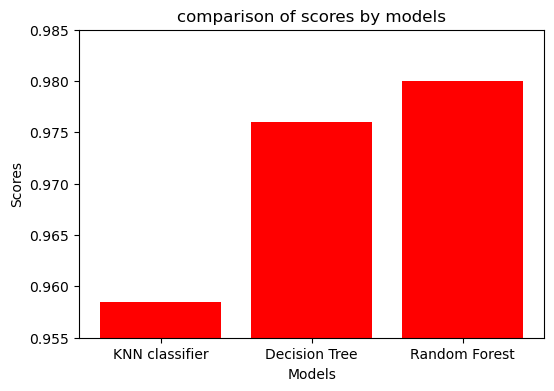

In [252]:
#SUMMARIZE THE RESULTS

#STORE ALL THE MODEL NAMES AND SCORES IN LISTS TO PLOT

model_names = ['KNN classifier', 'Decision Tree', 'Random Forest']

#y_position = np.arange(len(model_names))
model_scores = [score, score_tree , model_RFscore]


#comparison of scores by models (PLOTTING)

fig = plt.figure(figsize = (6,4))
plt.bar(model_names, model_scores, color = 'red')
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("comparison of scores by models")
plt.ylim(0.955, 0.985)
plt.show

In [253]:
print("Three classification models i.e. KNN Classifier, Decision Tree and Random Forest have been trained")
print("According to the accuracy scores and visualizations above, RandomForest gives highest accuracy with 98%")
      

Three classification models i.e. KNN Classifier, Decision Tree and Random Forest have been trained
According to the accuracy scores and visualizations above, RandomForest gives highest accuracy with 98%
